<p align="center">
  Benjamin Nguyen
</p>


# Excersice 1


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
np.random.seed(999)


### Handwritten Letter & Digit Recognition using KNN on Extended MNIST Dataset

In [3]:
# Function to fix orientation for all images
def fix_orientation(X):
    return np.array([x.reshape(28,28, order='F').flatten() for x in X])

In [5]:
data = np.load("emnist_balanced.npz")
X = data["X"]
y = data["y"]
print("Shapes:", X.shape, y.shape)

Shapes: (131600, 784) (131600,)


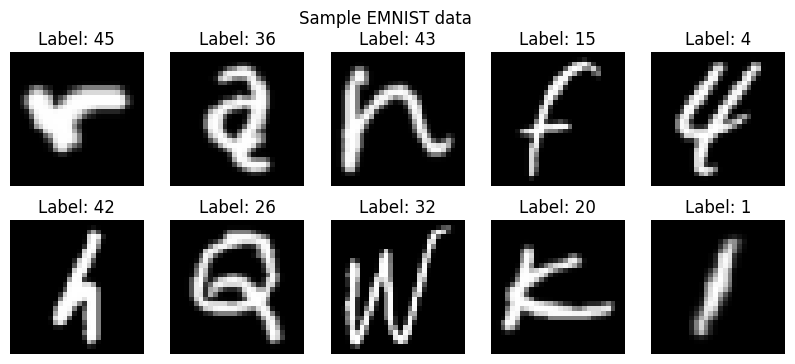

In [6]:
# Load EMNIST-balaced dataset, which includes:
#   - 47 classes total
#       - Digits: 0–9
#       - Uppercase letters: A–Z
#       - Lowercase letters: a–z
#   - but ambiguous lowercase/uppercase classes are merged, e.g.,
#       - 'C' and 'c' => one class
#       - 'O' and 'o' => one class
#       - 'I' and 'l' => one class
# That's why the total is 47 classes instead of 62.
# 
# emnist = fetch_openml(name='EMNIST_Balanced', version=1, as_frame=False)

# X_raw = emnist["data"]
# y = emnist["target"].astype(np.int32)  # labels are strings, convert to int

# print("Fixing EMNIST orientation...")
# X = fix_orientation(X_raw)

# print(f"Data shape: {X.shape}")
# print(f"Number of samples: {len(X)}, Number of classes: {len(np.unique(y))}")

# Display a few example digits
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set_title(f"Label: {y[i]}")
    axi.axis('off')
plt.suptitle("Sample EMNIST data")
plt.show()

In [8]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9999)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 105280
Test set size: 26320


In [12]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Compute and report accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Test Set Accuracy: 0.7768 (77.68%)



Confusion Matrix:
[[354   0   0 ...   0   0   1]
 [  0 362   0 ...   0   1   0]
 [  1   0 441 ...   0   0   1]
 ...
 [  0   7   8 ... 190   1   8]
 [  0   3   0 ...   0 543   1]
 [  0  28   0 ...   0   3 433]]


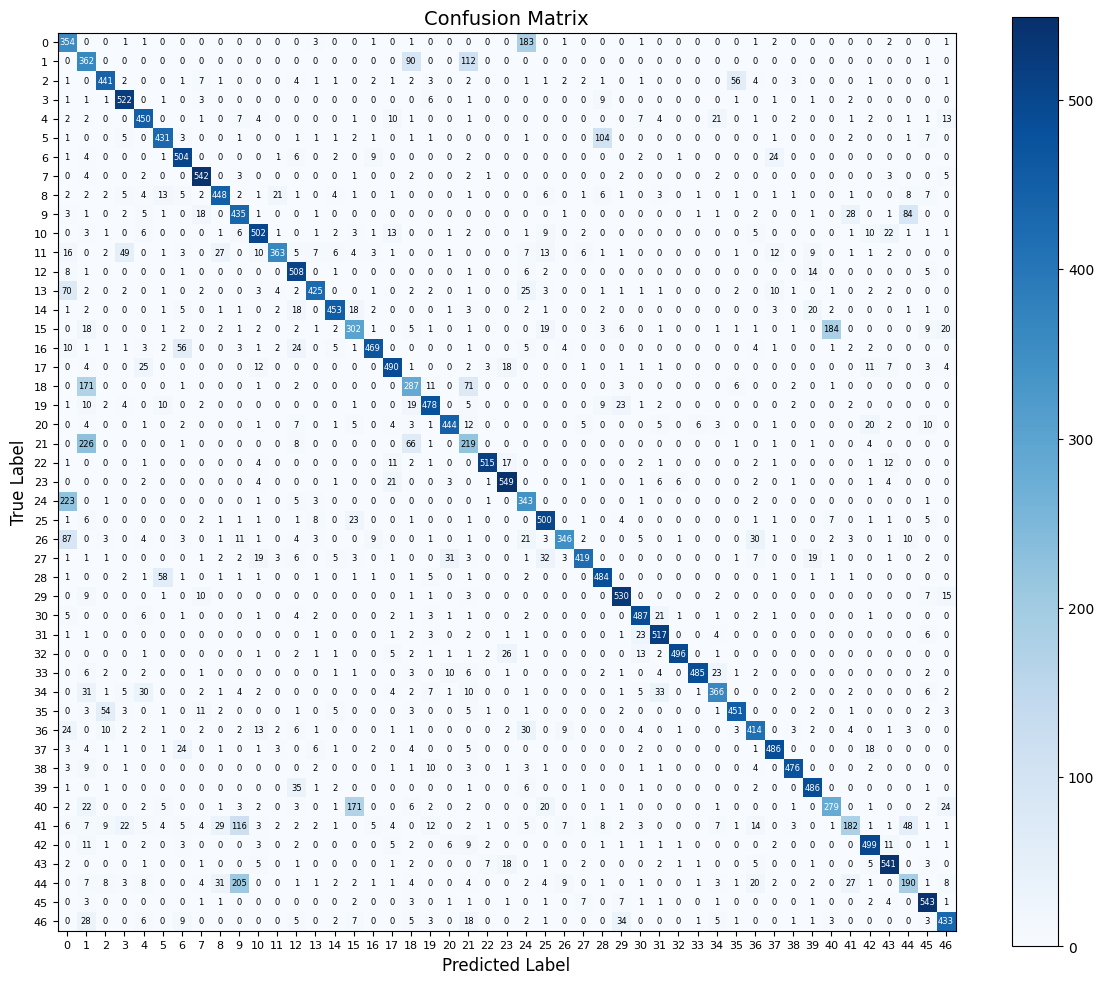

In [15]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(12, 10))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

num_classes = len(np.unique(y))
plt.xticks(range(num_classes), range(num_classes), fontsize=8)
plt.yticks(range(num_classes), range(num_classes), fontsize=8)

for i in range(num_classes):
    for j in range(num_classes):
        text_color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
        plt.text(j, i, str(conf_matrix[i, j]), 
                ha='center', va='center', 
                color=text_color, fontsize=6)

plt.tight_layout()

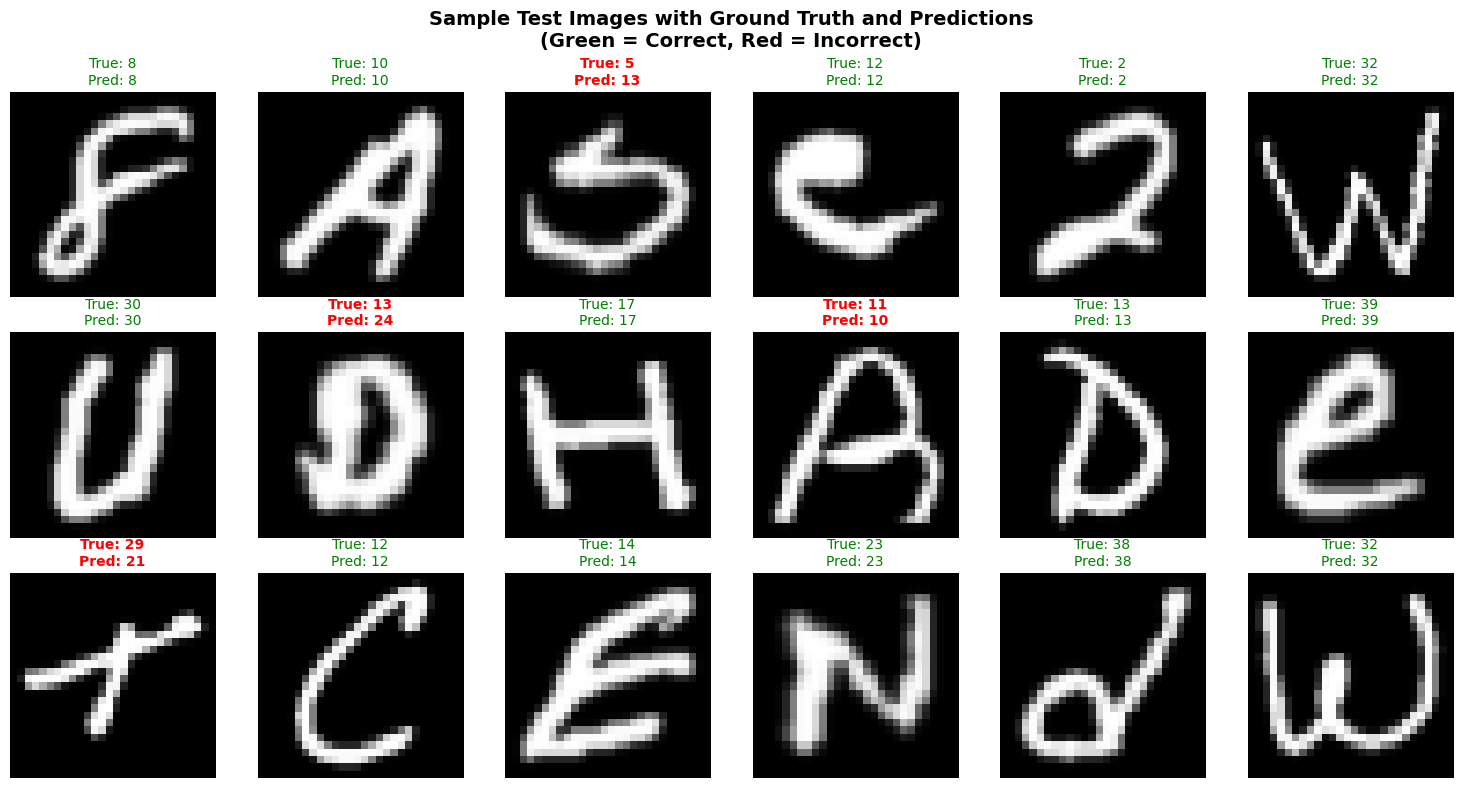

In [17]:
random_indices = np.random.choice(len(X_test), size=18, replace=False)

fig, axes = plt.subplots(3, 6, figsize=(15, 8))
for i, (ax, idx) in enumerate(zip(axes.flat, random_indices)):
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    
    if true_label == pred_label:
        color = 'green'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=10)
    else:
        color = 'red'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=10, fontweight='bold')
    
    ax.axis('off')

plt.suptitle('Sample Test Images with Ground Truth and Predictions\n(Green = Correct, Red = Incorrect)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Exercise 2

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io

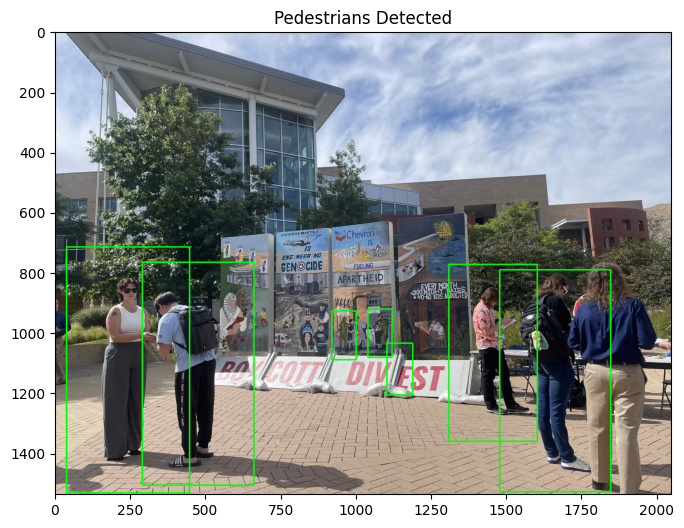

In [ ]:
img = io.imread('./img1.jpeg')

hog = cv.HOGDescriptor()
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())
  
(regions, _) = hog.detectMultiScale(img,
    hitThreshold=0.5,      
    winStride=(4,4),        
    padding=(4,4),          
    scale=1.05,             
    groupThreshold=1,       
    useMeanshiftGrouping=False)
  
# Drawing the regions in the Image
for (x, y, w, h) in regions:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=3)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Pedestrians Detected")
plt.show()

Interestingly, the algorithm also detects people on the wall.

- `hitThreshold`: confidence threshold: lower = more detections, higher = stricter
- `winStride`: sliding window step size: smaller = more thorough, larger = faster
- `padding`: extra border around detection window for edge cases
- `scale`:  scale factor between pyramid levels: smaller = more scales tested
- `groupThreshold`: min overlapping detections to keep result: lower = more detections kept


# Excersice 3

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

Text(0.5, 1.0, 'Faces and Smiles Detected')

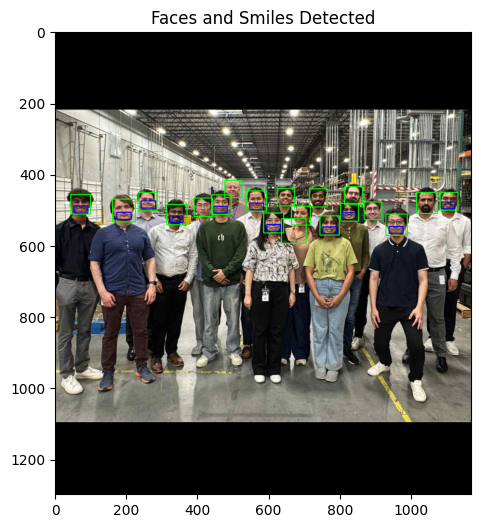

In [45]:
img = io.imread('./img2.jpeg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

# trained data: https://github.com/opencv/opencv/tree/master/data/haarcascades
haar_face = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
haar_smile = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_smile.xml')

faces = haar_face.detectMultiScale(img_gray,
    scaleFactor=1.3,
    minNeighbors=4,
    flags=0,
    minSize=(0,0),
    maxSize=(0,0)) 

for (x, y, w, h) in faces: 
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2) 
    
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    smile = haar_smile.detectMultiScale(roi_gray, scaleFactor=1.02, minNeighbors=9)
    for (ex,ey,ew,eh) in smile:
        cv.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,0,255), thickness=2)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Faces and Smiles Detected")

Parameters: 

- `scaleFactor`: detection sensitivity. A smaller value makes the detector more sensitive and able to find smaller faces, and it may increase false positives.
- `minNeighbors`: filter strength. Lower values increase sensitivity. Higher values make detection more reliable but may cause real faces or smiles to be missed if the filter becomes too strict.
- `minSize`: smallest object to detect. Decreasing it allows detection of very small faces but increases noise. Increasing it filters out small or distant objects, reducing false detections but potentially missing small valid faces.
- `maxSize`: largest object to detect, it is the opposite of minSize.